In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df = pd.read_csv('Housing.csv')
df.head(20)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [37]:
print(df.shape) #print shape of the dataset

(545, 13)


In [38]:
df.dropna()  #to drop null values

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [39]:
#Count Null values
total_na = df.isna().sum().sum()
print(total_na)

0


<Axes: >

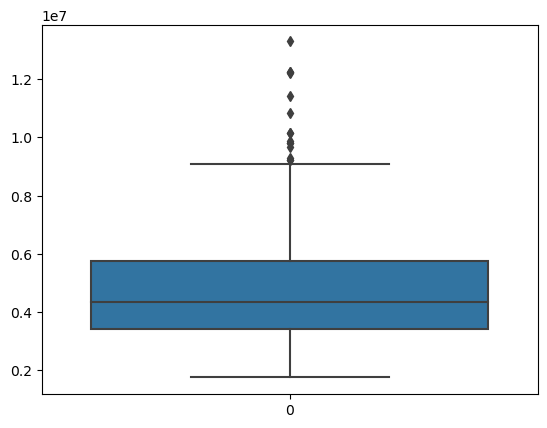

In [40]:
import seaborn as sns
sns.boxplot(df['price'])

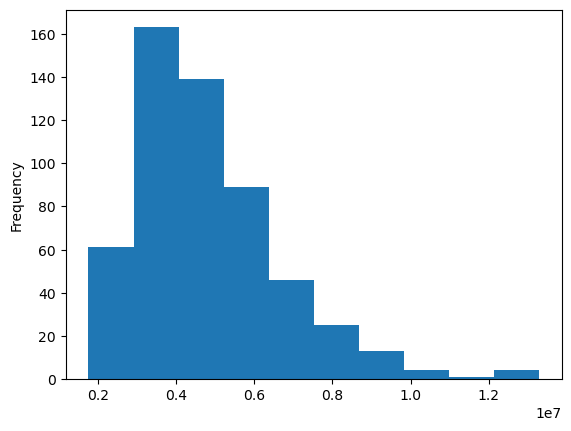

In [41]:
#histogram of house price
df['price'].plot(kind = 'hist')
plt.show()

In [42]:
bedroom_groups = df.groupby('bedrooms')['price']
price_stats = bedroom_groups.agg(['mean', 'median', 'count','std'])
print(price_stats)

                  mean     median  count           std
bedrooms                                              
1         2.712500e+06  2712500.0      2  6.187184e+05
2         3.632022e+06  3535000.0    136  1.004024e+06
3         4.954598e+06  4620000.0    300  1.747527e+06
4         5.729758e+06  5250000.0     95  2.307740e+06
5         5.819800e+06  5582500.0     10  2.502315e+06
6         4.791500e+06  4791500.0      2  1.826457e+06


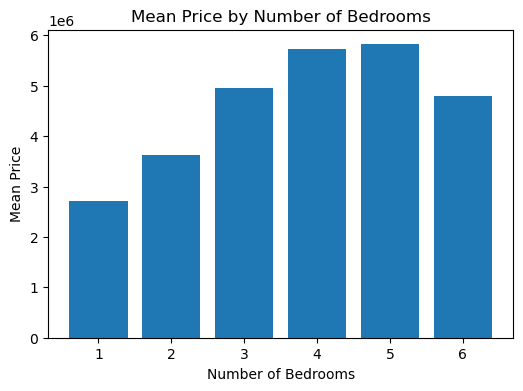

In [43]:
# Bar chart of mean prices
plt.figure(figsize=(6, 4))
plt.bar(price_stats.index, price_stats['mean'])
plt.xlabel('Number of Bedrooms')
plt.ylabel('Mean Price')
plt.title('Mean Price by Number of Bedrooms')
plt.show()


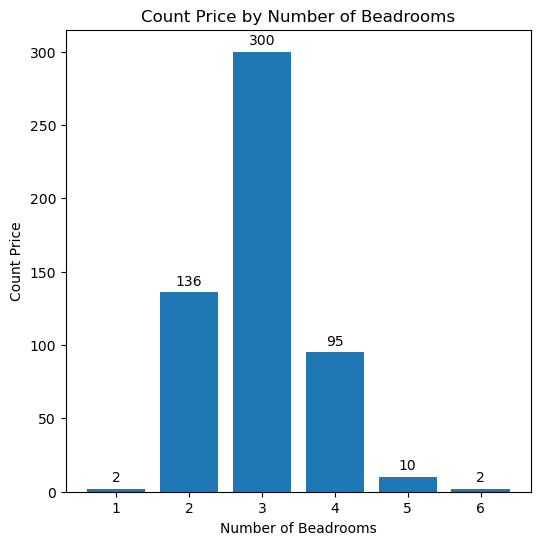

In [44]:
plt.figure(figsize=(6,6))
plt.bar(price_stats.index,price_stats['count'])
plt.xlabel("Number of Beadrooms")
plt.ylabel("Count Price")
plt.title('Count Price by Number of Beadrooms')
# Annotate each bar with its count
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points',
                 ha='center', va='bottom')

plt.show()
plt.show()

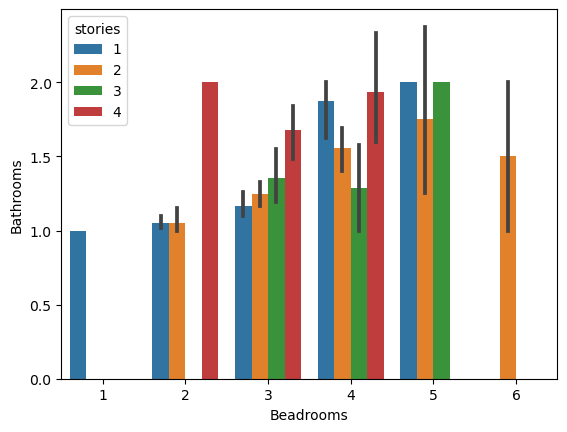

In [50]:
#barplot using saeborn
sns.barplot(data=df, x="bedrooms", y="bathrooms", hue="stories")
plt.xlabel("Beadrooms")
plt.ylabel("Bathrooms")
plt.show()

<Figure size 2000x1200 with 0 Axes>

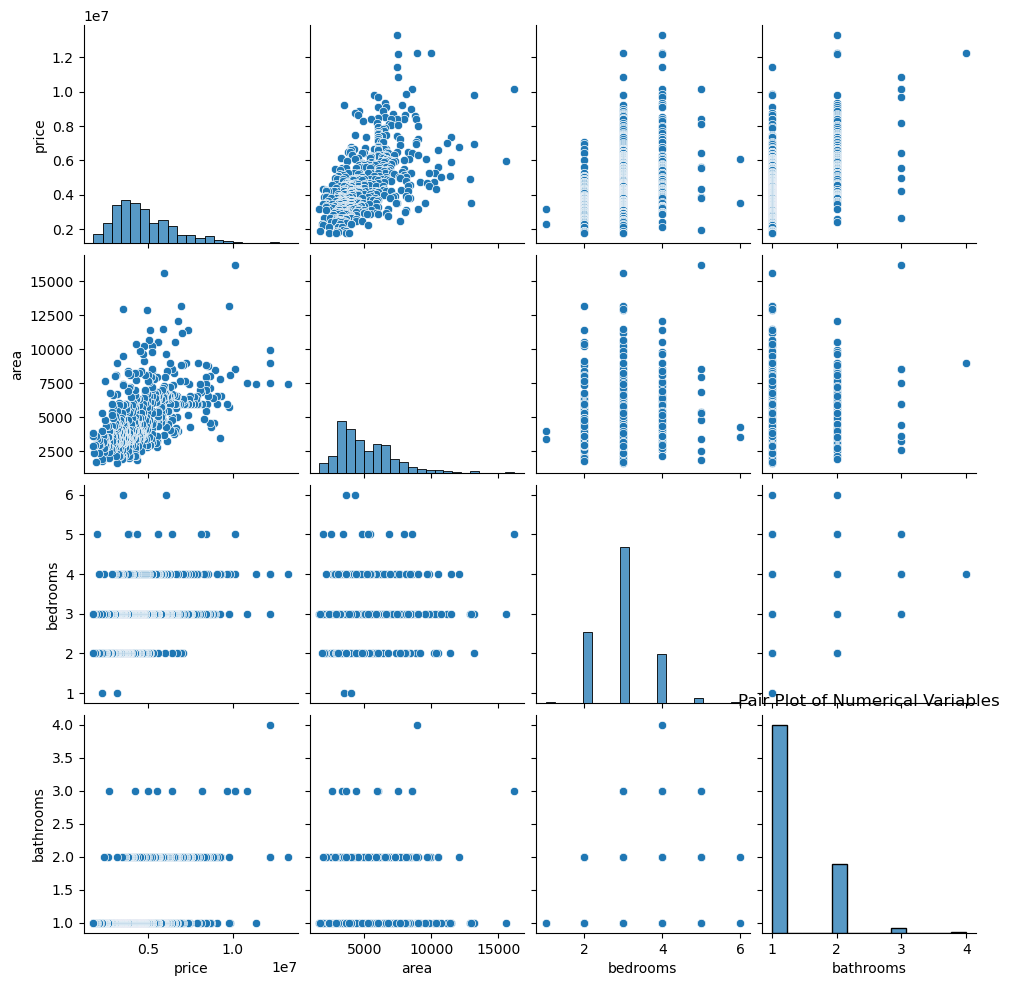

In [52]:
#pair plot for multiple variables
plt.figure(figsize=(20,12))
sns.pairplot(df[['price', 'area', 'bedrooms', 'bathrooms']])
plt.title('Pair Plot of Numerical Variables')
plt.show()


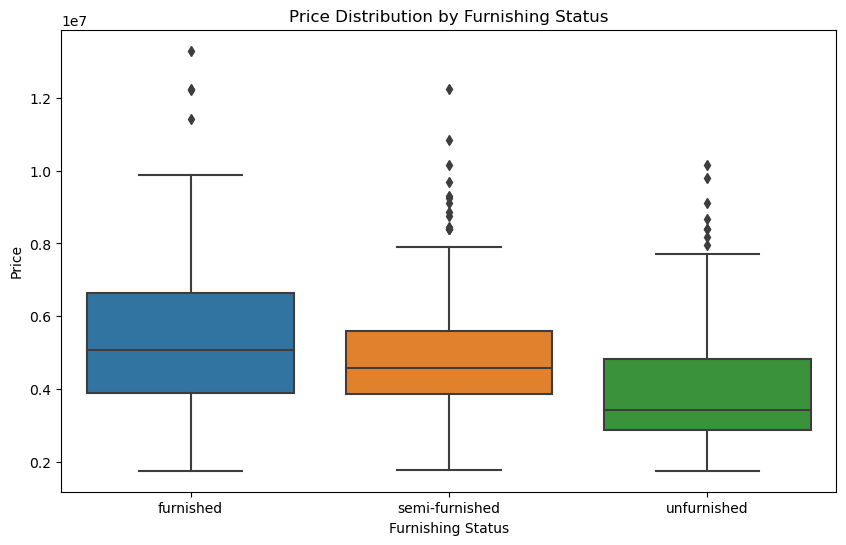

In [55]:
#Price Distribution by Furnishing Status using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='furnishingstatus', y='price', data=df)
plt.xlabel('Furnishing Status')
plt.ylabel('Price')
plt.title('Price Distribution by Furnishing Status')
plt.xticks(rotation=0)
plt.show()

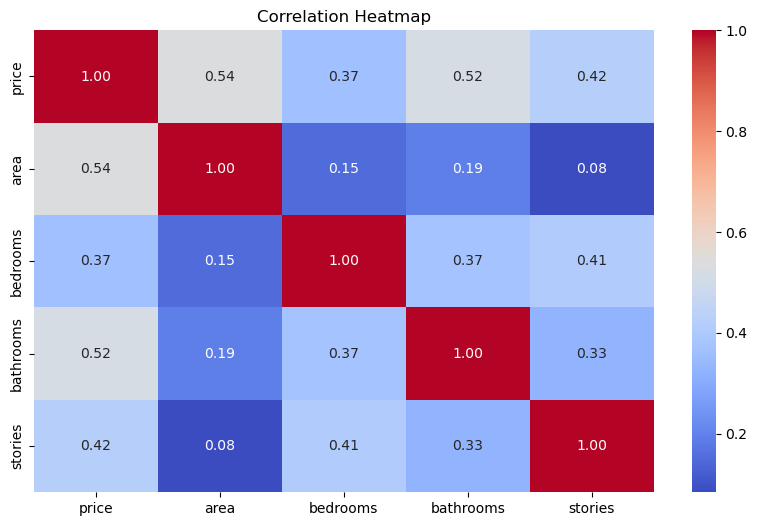

In [58]:
# Create a DataFrame subset with the selected columns
subset = df[['price', 'area', 'bedrooms', 'bathrooms', 'stories']]

# Calculate the correlation matrix for the selected columns
correlation_matrix = subset.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [77]:
# Numerical features
numerical_features = ['bedrooms', 'bathrooms', 'area', 'stories','parking']

# Categorical features
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# Select the subsets of data
X_numerical = df[numerical_features]
X_categorical = df[categorical_features]
y = df['price']

In [78]:
# Apply one-hot encoding to categorical features
X_categorical_encoded = pd.get_dummies(X_categorical, drop_first=True)

In [79]:
# Concatenate numerical and encoded categorical features
X_combined = pd.concat([X_numerical, X_categorical_encoded], axis=1)

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

In [81]:
#training the model using linear regression
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [82]:
#Making prediction
y_pred = model.predict(X_test)

In [85]:

# Create a DataFrame with the same column names as your original dataset
new_house = pd.DataFrame({
    'bedrooms': [2],
    'bathrooms': [2.5],
    'area': [6000],
    'stories': [2],
    'mainroad': ['no'],
    'guestroom': ['yes'],
    'basement': ['no'],
    'hotwaterheating': ['yes'],
    'airconditioning': ['yes'],
    'parking': [1],
    'prefarea': ['yes'],
    'furnishingstatus': ['furnished']
})

# Apply one-hot encoding to categorical features
new_house_encoded = pd.get_dummies(new_house, columns=categorical_features, drop_first=True)

# Ensure the order and names of columns match the training data
new_house_encoded = new_house_encoded.reindex(columns=X_combined.columns, fill_value=0)

# Make predictions using the trained model
predicted_price = model.predict(new_house_encoded)

print("Predicted Price:", predicted_price[0])

Predicted Price: 5605309.656622494
